In [ ]:
!pip install pandas
!pip install matplotlib


  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 533.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 3.3 MB/s eta 0:00:00a 0:00:01


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Path to the file
file_path = './output/frame_trajectory.txt'

# Read the space-separated txt file into a DataFrame
df = pd.read_table(file_path, delim_whitespace=True, header=None, 
                   names=['timestamp', 'x', 'y', 'z', 'qx', 'qy', 'qz', 'qw'])

# Print the first 10 values of x, y, z columns
print(df[['timestamp','x', 'y', 'z']].head(10))


   timestamp         x         y         z
0   0.000000 -0.000000 -0.000000 -0.000000
1   0.166834  0.000088 -0.000263  0.014065
2   0.200200 -0.000816  0.000262  0.017842
3   0.233567  0.000118 -0.000181  0.021009
4   0.266934  0.000580 -0.000026  0.024933
5   0.300300  0.001764  0.000327  0.028248
6   0.333667  0.003043  0.000912  0.032771
7   0.367034  0.003607  0.001313  0.036186
8   0.400400  0.005305  0.001747  0.040462
9   0.433767  0.007065  0.002199  0.044074


/tmp/ipykernel_5034/3768345225.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(file_path, delim_whitespace=True, header=None,


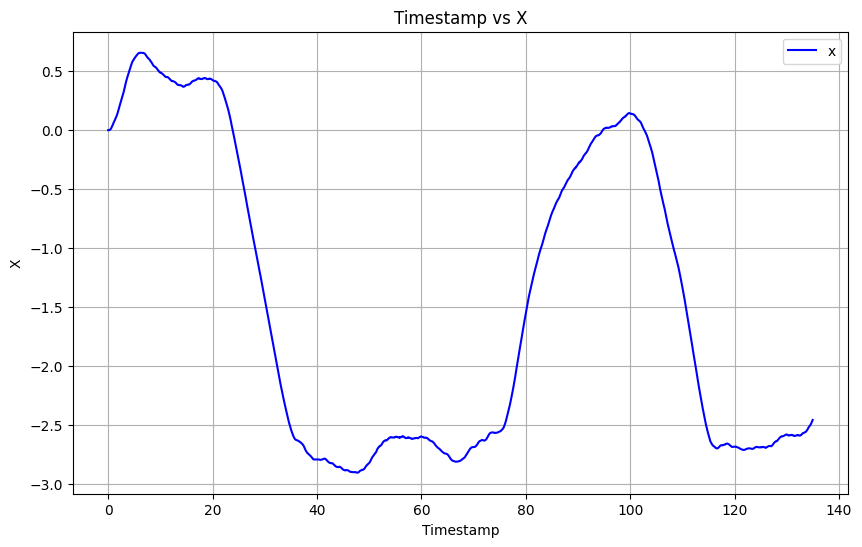

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['x'], label='x', color='b')
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('Timestamp vs X')
plt.grid(True)
plt.legend()
plt.show()

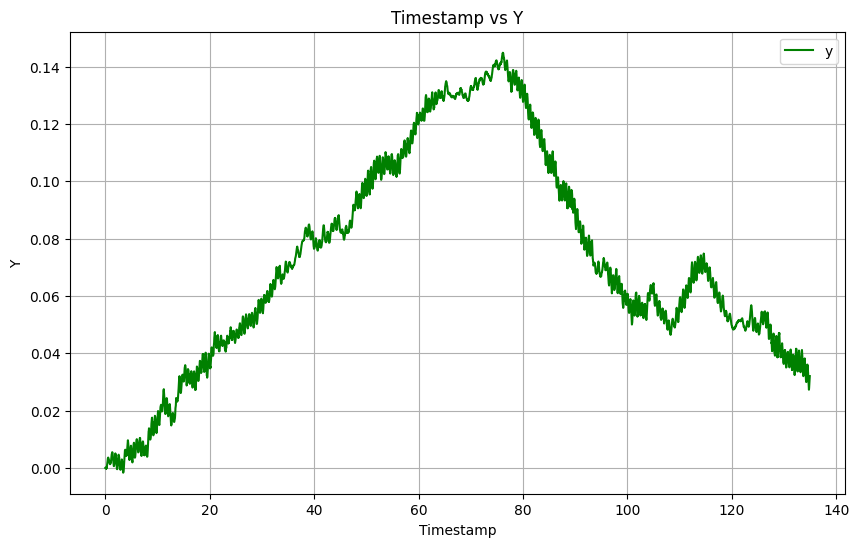

In [10]:
# Plot timestamp vs y
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['y'], label='y', color='g')
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('Timestamp vs Y')
plt.grid(True)
plt.legend()
plt.show()


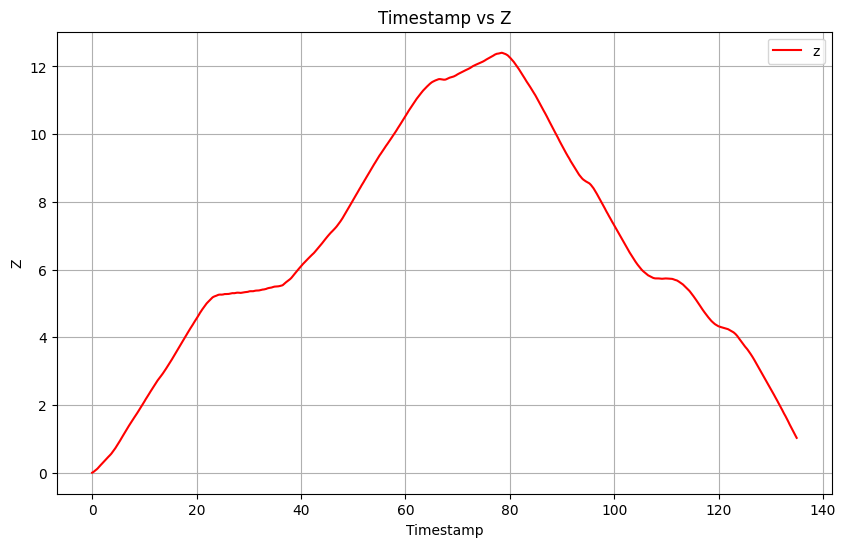

In [11]:
# Plot timestamp vs z
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['z'], label='z', color='r')
plt.xlabel('Timestamp')
plt.ylabel('Z')
plt.title('Timestamp vs Z')
plt.grid(True)
plt.legend()
plt.show()
